In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download shubhambathwal/flight-price-prediction

Dataset URL: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction
License(s): CC0-1.0
  0% 0.00/4.16M [00:00<?, ?B/s]
100% 4.16M/4.16M [00:00<00:00, 630MB/s]


In [ ]:
!unzip /content/flight-price-prediction.zip

Archive:  /content/flight-price-prediction.zip
  inflating: Clean_Dataset.csv       
  inflating: business.csv            
  inflating: economy.csv             


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
clean_data=pd.read_csv('/content/Clean_Dataset.csv')

In [ ]:
clean_data.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
economy_data=pd.read_csv('/content/economy.csv')

In [ ]:
economy_data.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953"
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953"
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956"
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955"
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955"


In [ ]:
buisness_data=pd.read_csv('/content/business.csv')

In [ ]:
buisness_data.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price
0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,"25,612"
1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,"25,612"
2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,"42,220"
3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"44,450"
4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,"46,690"


In [ ]:
economy_data['class']='economy'
buisness_data['class']='buisness'

In [ ]:
buisness_data=buisness_data.applymap(lambda x: str(x).replace('\n','').replace('\t','').strip()  if isinstance(x,str) else(x))

/tmp/ipython-input-12-3585004596.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  buisness_data=buisness_data.applymap(lambda x: str(x).replace('\n','').replace('\t','').strip()  if isinstance(x,str) else(x))


In [ ]:
flights=pd.concat([economy_data,buisness_data],ignore_index=True)

In [ ]:
flights.head()

,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,class
0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy
1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy
2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy
3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy
4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy


In [ ]:
flights=flights.applymap(lambda x: str(x).replace('\n','').replace('\t','').strip()  if isinstance(x,str) else(x))

/tmp/ipython-input-15-2587231360.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  flights=flights.applymap(lambda x: str(x).replace('\n','').replace('\t','').strip()  if isinstance(x,str) else(x))


In [ ]:
flights['flight_code']=flights['ch_code']+'-'+flights['num_code'].astype(str)

In [ ]:
flights=flights.drop(['ch_code','num_code'],axis=1)

In [ ]:
flights.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,flight_code
0,11-02-2022,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,"5,953",economy,SG-8709
1,11-02-2022,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,"5,953",economy,SG-8157
2,11-02-2022,AirAsia,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,"5,956",economy,I5-764
3,11-02-2022,Vistara,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,"5,955",economy,UK-995
4,11-02-2022,Vistara,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,"5,955",economy,UK-963


In [ ]:
flights['price'] = flights['price'].astype(str).str.replace(',', '').astype(float)


In [ ]:
flights.head()

,date,airline,dep_time,from,time_taken,stop,arr_time,to,price,class,flight_code
0,11-02-2022,SpiceJet,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953.0,economy,SG-8709
1,11-02-2022,SpiceJet,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953.0,economy,SG-8157
2,11-02-2022,AirAsia,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956.0,economy,I5-764
3,11-02-2022,Vistara,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955.0,economy,UK-995
4,11-02-2022,Vistara,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955.0,economy,UK-963


In [ ]:
def time_to_minutes(t):
    t = str(t).strip()

    if 'h' in t:
        parts = t.split('h')
        h = float(parts[0].strip()) if parts[0].strip() else 0
        m = parts[1].replace('m', '').strip() if len(parts) > 1 else '0'
        m = int(m) if m else 0
        return int(h * 60 + m)

    elif 'm' in t:
        m = t.replace('m', '').strip()
        return int(m) if m else 0

    else:
        return int(float(t) * 60)


flights['duration_mins'] = flights['time_taken'].apply(time_to_minutes) # fallback, maybe pure hours in float


In [ ]:
flights=flights.drop('time_taken',axis=1)

In [ ]:
flights.head()

,date,airline,dep_time,from,stop,arr_time,to,price,class,flight_code,duration_mins
0,11-02-2022,SpiceJet,18:55,Delhi,non-stop,21:05,Mumbai,5953.0,economy,SG-8709,130
1,11-02-2022,SpiceJet,06:20,Delhi,non-stop,08:40,Mumbai,5953.0,economy,SG-8157,140
2,11-02-2022,AirAsia,04:25,Delhi,non-stop,06:35,Mumbai,5956.0,economy,I5-764,130
3,11-02-2022,Vistara,10:20,Delhi,non-stop,12:35,Mumbai,5955.0,economy,UK-995,135
4,11-02-2022,Vistara,08:50,Delhi,non-stop,11:10,Mumbai,5955.0,economy,UK-963,140


In [ ]:
flights['date']=pd.to_datetime(flights['date'],dayfirst=True)

In [ ]:
flights['dep_hour'] = pd.to_datetime(flights['dep_time'], format='%H:%M').dt.hour
flights['arr_hour'] = pd.to_datetime(flights['arr_time'], format='%H:%M').dt.hour
flights['day_of_week'] = flights['date'].dt.dayofweek

In [ ]:
flights=flights.drop(columns=['dep_time','arr_time','stop','flight_code','day_of_week'])

In [ ]:
flights.head()

,date,airline,from,to,price,class,duration_mins,dep_hour,arr_hour
0,2022-02-11,SpiceJet,Delhi,Mumbai,5953.0,economy,130,18,21
1,2022-02-11,SpiceJet,Delhi,Mumbai,5953.0,economy,140,6,8
2,2022-02-11,AirAsia,Delhi,Mumbai,5956.0,economy,130,4,6
3,2022-02-11,Vistara,Delhi,Mumbai,5955.0,economy,135,10,12
4,2022-02-11,Vistara,Delhi,Mumbai,5955.0,economy,140,8,11


In [ ]:
flights['from'].value_counts()

,count
from,
Delhi,61345
Mumbai,60903
Bangalore,52106
Kolkata,46347
Hyderabad,40860
Chennai,38700


In [ ]:
flights['route']=flights['from']+'_'+flights['to']


In [ ]:
top_route=flights['route'].value_counts().nlargest(50).index

In [ ]:
flights['route']=flights['route'].apply(lambda x:x if x in top_route else 'other')

In [ ]:
flights.head()

,date,airline,from,to,price,class,duration_mins,dep_hour,arr_hour,route
0,2022-02-11,SpiceJet,Delhi,Mumbai,5953.0,economy,130,18,21,Delhi_Mumbai
1,2022-02-11,SpiceJet,Delhi,Mumbai,5953.0,economy,140,6,8,Delhi_Mumbai
2,2022-02-11,AirAsia,Delhi,Mumbai,5956.0,economy,130,4,6,Delhi_Mumbai
3,2022-02-11,Vistara,Delhi,Mumbai,5955.0,economy,135,10,12,Delhi_Mumbai
4,2022-02-11,Vistara,Delhi,Mumbai,5955.0,economy,140,8,11,Delhi_Mumbai


In [ ]:
flights=flights.drop(columns=['from','to'])

In [ ]:
flights.head()

,date,airline,price,class,duration_mins,dep_hour,arr_hour,route
0,2022-02-11,SpiceJet,5953.0,economy,130,18,21,Delhi_Mumbai
1,2022-02-11,SpiceJet,5953.0,economy,140,6,8,Delhi_Mumbai
2,2022-02-11,AirAsia,5956.0,economy,130,4,6,Delhi_Mumbai
3,2022-02-11,Vistara,5955.0,economy,135,10,12,Delhi_Mumbai
4,2022-02-11,Vistara,5955.0,economy,140,8,11,Delhi_Mumbai


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize encoder
label_encoder = LabelEncoder()

# Fit and transform the 'route' column
flights['route'] = label_encoder.fit_transform(flights['route'])


In [ ]:
flights.head()

,date,airline,price,class,duration_mins,dep_hour,arr_hour,route
0,2022-02-11,SpiceJet,5953.0,economy,130,18,21,14
1,2022-02-11,SpiceJet,5953.0,economy,140,6,8,14
2,2022-02-11,AirAsia,5956.0,economy,130,4,6,14
3,2022-02-11,Vistara,5955.0,economy,135,10,12,14
4,2022-02-11,Vistara,5955.0,economy,140,8,11,14


In [ ]:
flights['class']=flights['class'].map({'economy':1,'buisness':2})

In [ ]:
flights.head()


,date,airline,price,class,duration_mins,dep_hour,arr_hour,route
0,2022-02-11,SpiceJet,5953.0,1,130,18,21,14
1,2022-02-11,SpiceJet,5953.0,1,140,6,8,14
2,2022-02-11,AirAsia,5956.0,1,130,4,6,14
3,2022-02-11,Vistara,5955.0,1,135,10,12,14
4,2022-02-11,Vistara,5955.0,1,140,8,11,14


In [ ]:
flights['airline']=label_encoder.fit_transform(flights['airline'])

In [ ]:
flights.head()

,date,airline,price,class,duration_mins,dep_hour,arr_hour,route
0,2022-02-11,4,5953.0,1,130,18,21,14
1,2022-02-11,4,5953.0,1,140,6,8,14
2,2022-02-11,1,5956.0,1,130,4,6,14
3,2022-02-11,7,5955.0,1,135,10,12,14
4,2022-02-11,7,5955.0,1,140,8,11,14


In [ ]:
import numpy as np

np.random.seed(42)
flights['demand']=(200-0.02*flights['price'])+np.random.normal(0,5,size=len(flights))
flights['demand']=flights['demand'].round().astype(int)

In [ ]:
flights.head()

,date,airline,price,class,duration_mins,dep_hour,arr_hour,route,demand
0,2022-02-11,4,5953.0,1,130,18,21,14,83
1,2022-02-11,4,5953.0,1,140,6,8,14,80
2,2022-02-11,1,5956.0,1,130,4,6,14,84
3,2022-02-11,7,5955.0,1,135,10,12,14,89
4,2022-02-11,7,5955.0,1,140,8,11,14,80


In [ ]:
flights.head()

,date,airline,price,class,duration_mins,dep_hour,arr_hour,route,demand
0,2022-02-11,4,5953.0,1,130,18,21,14,83
1,2022-02-11,4,5953.0,1,140,6,8,14,80
2,2022-02-11,1,5956.0,1,130,4,6,14,84
3,2022-02-11,7,5955.0,1,135,10,12,14,89
4,2022-02-11,7,5955.0,1,140,8,11,14,80


In [ ]:
x=flights.drop(columns=['demand', 'date'])
y=flights['demand']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
print(x_train)

        airline    price  class  duration_mins  dep_hour  arr_hour  route
195919        7   4755.0      1           1220        12         8      5
192627        7   4637.0      1           1015        21        14      9
112435        3   2767.0      1            600        10        20      2
81668         7   8130.0      1            670         9        20     26
242190        7  64509.0      2           1055        22        16     26
...         ...      ...    ...            ...       ...       ...    ...
119879        3  12894.0      1            145        11        13     22
259178        0  51114.0      2           2265         7        21      0
131932        7   8579.0      1            485        10        18     24
146867        3   4367.0      1            420        16        23     23
121958        2   3999.0      1            150         6         8     22

[240208 rows x 7 columns]


In [ ]:
!pip install optuna

In [ ]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [ ]:
def objective(trial):
  params={
      'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
       'max_depth': trial.suggest_int('max_depth', 3, 10),
       'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
       'subsample': trial.suggest_float('subsample', 0.5, 1.0),
       'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
       'gamma': trial.suggest_float('gamma', 0, 5),
  }
  model=XGBRegressor(**params)
  model.fit(x_train,y_train)
  preds=model.predict(x_test)
  mse=mean_squared_error(y_test,preds)
  return mse

study=optuna.create_study(direction='minimize')
study.optimize(objective,n_trials=25)

best_params=study.best_params
print(best_params)


[I 2025-07-29 17:43:55,052] A new study created in memory with name: no-name-fce29d17-367a-4ca3-90ad-a7a6aa3ab853
[I 2025-07-29 17:44:17,386] Trial 0 finished with value: 102.74724578857422 and parameters: {'n_estimators': 308, 'max_depth': 6, 'learning_rate': 0.12499807897352669, 'subsample': 0.5615880226472929, 'colsample_bytree': 0.9790871924184315, 'gamma': 2.2729992328429245}. Best is trial 0 with value: 102.74724578857422.
[I 2025-07-29 17:44:31,385] Trial 1 finished with value: 113.52347564697266 and parameters: {'n_estimators': 240, 'max_depth': 10, 'learning_rate': 0.22871003677213803, 'subsample': 0.7925474992260313, 'colsample_bytree': 0.9660545567048971, 'gamma': 4.973029553786555}. Best is trial 0 with value: 102.74724578857422.
[I 2025-07-29 17:44:39,373] Trial 2 finished with value: 113.89643859863281 and parameters: {'n_estimators': 336, 'max_depth': 7, 'learning_rate': 0.2110109793287282, 'subsample': 0.5697780361389528, 'colsample_bytree': 0.9454441535707482, 'gamma':

{'n_estimators': 190, 'max_depth': 5, 'learning_rate': 0.13747190979683513, 'subsample': 0.5806779962909039, 'colsample_bytree': 0.9525305491317989, 'gamma': 0.34514859830793143}


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
model=XGBRegressor(**best_params)
model.fit(x_train,y_train)
preds=model.predict(x_test)
mse=mean_squared_error(y_test,preds)
print(mse)
r2=r2_score(y_test,preds)
print(r2)

99.21603393554688
0.9995179772377014


In [ ]:
future_input = pd.DataFrame({
    'airline': [1],
    'price':[4755.0],
    'class': [1],
    'duration_mins': [150],
    'dep_hour': [9],
    'arr_hour': [11],
    'route': [14],


})

future_demand = model.predict(future_input)
print("Predicted Demand:", future_demand[0])


Predicted Demand: 105.79543


                                          **Revenue=Price * Predicted_demand**
                                        

In [ ]:
def optimize_revenue(model,base_input,price_range=range(2000, 30000, 100)):
  best_price=None
  best_revenue=-np.inf
  for price in price_range:
    input_copy=base_input.copy()
    input_copy['price']=price
    input_df=pd.DataFrame(input_copy)
    predicted_demand=model.predict(input_df)[0]
    revenue=price*predicted_demand
    if revenue>best_revenue:
      best_revenue=revenue
      best_price=price
  return best_price,best_revenue




In [ ]:
future_input = {
    'airline': [2],
    'price':[5000.0],
    'class': [1],
    'duration_mins': [220],
    'dep_hour': [10],
    'arr_hour': [13],
    'route': [12]
}

In [ ]:
best_price, best_revenue= optimize_revenue(model, future_input)
print(f"💰 Recommended Price: ₹{best_price}")
print(f"📈 Max Revenue: ₹{best_revenue:.2f}")

💰 Recommended Price: ₹5000
📈 Max Revenue: ₹503219.25


In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

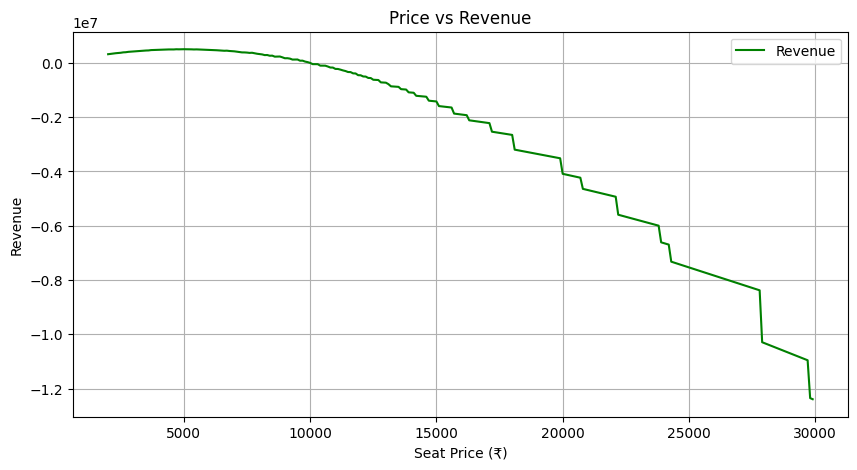

In [ ]:
import matplotlib.pyplot as plt

prices = list(range(2000, 30000, 100))
revenues = []
demands = []

for price in prices:
    input_copy = future_input.copy()
    input_copy['price'] = price
    input_df = pd.DataFrame(input_copy)
    predicted_demand = model.predict(input_df)[0]
    revenue = price * predicted_demand
    revenues.append(revenue)
    demands.append(predicted_demand)


plt.figure(figsize=(10, 5))
plt.plot(prices, revenues, label='Revenue', color='green')
plt.xlabel("Seat Price (₹)")
plt.ylabel("Revenue")
plt.title("Price vs Revenue")
plt.grid(True)
plt.legend()
plt.show()